# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [49]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns




file_path = "./../../assets/datasets/Sacramentorealestatetransactions.csv"

df = pd.read_csv(file_path)

columns = df.columns.values

df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

In [93]:

# clean = df[df[['sq__ft', 'beds','baths','price']] > 0]
clean = df[df['sq__ft'] > 0]
clean.head()


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


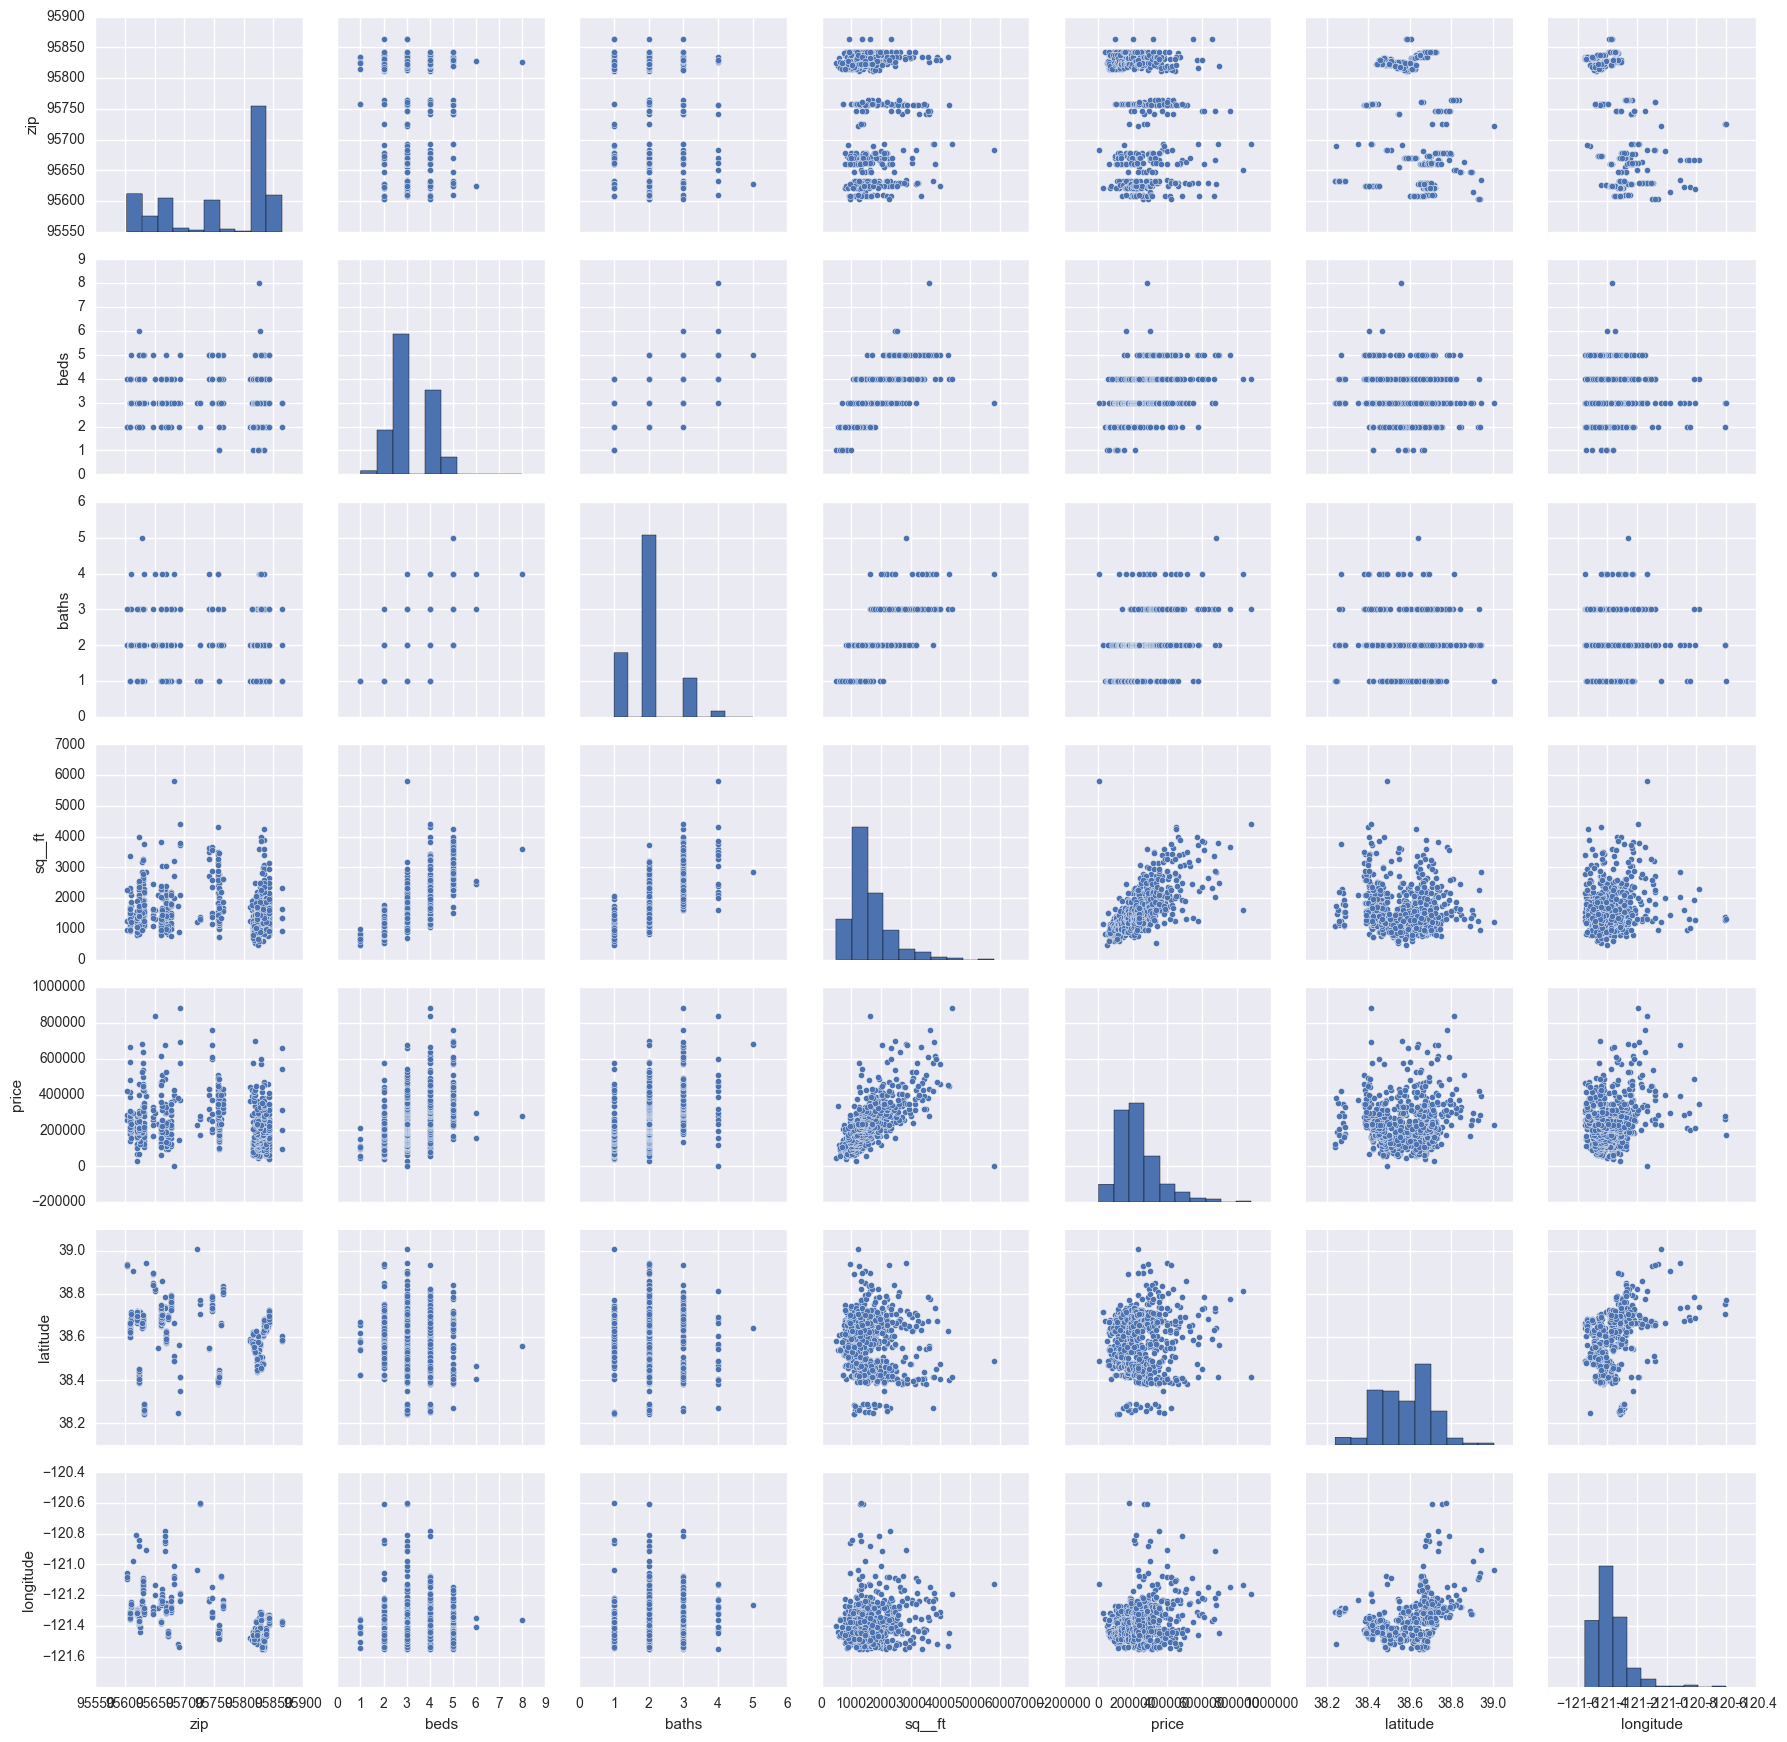

In [51]:
sns.pairplot(clean)

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

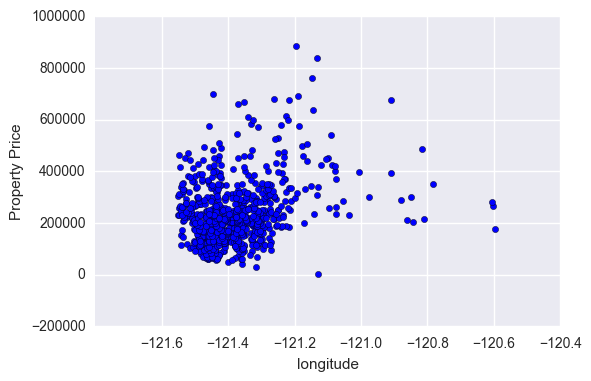

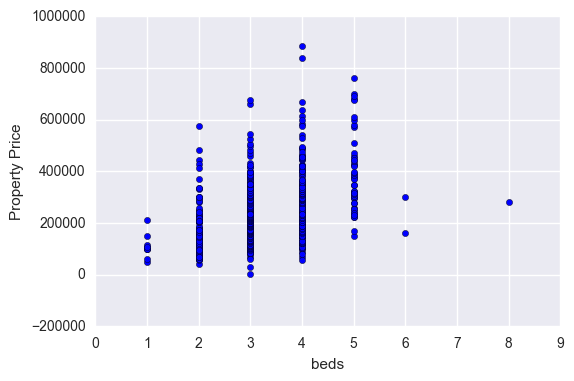

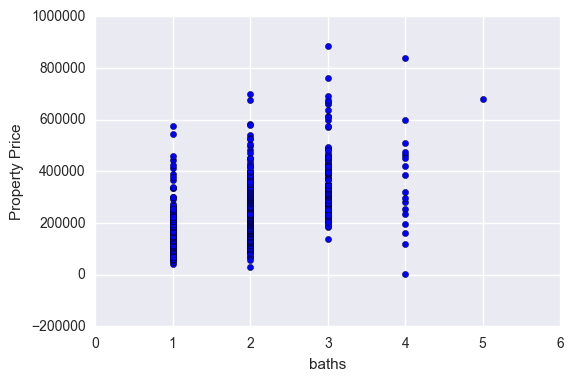

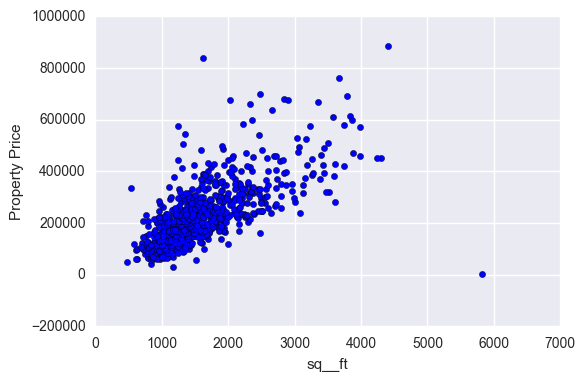

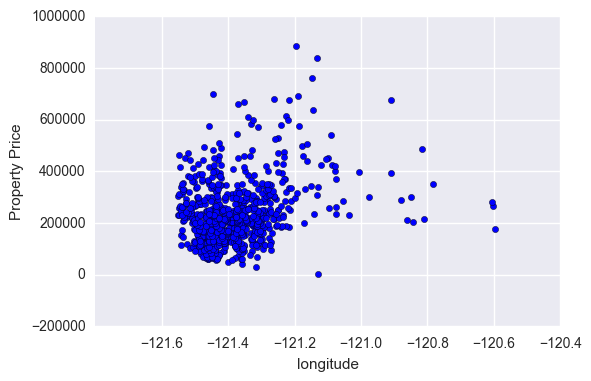

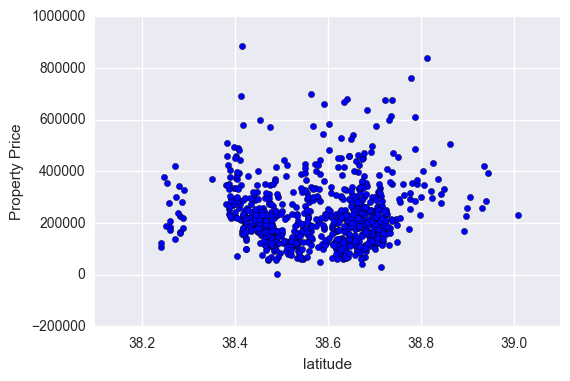

In [59]:
import seaborn as sns
from matplotlib import pyplot as plt

for col in ['beds','baths','sq__ft','longitude','latitude']:
    x = clean[col]
    y = clean['price']

    plt.scatter(x, y)
    plt.xlabel(col)
    plt.ylabel("Property Price")
    plt.show()


## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

sq__ft and longitude: 6944252325.78


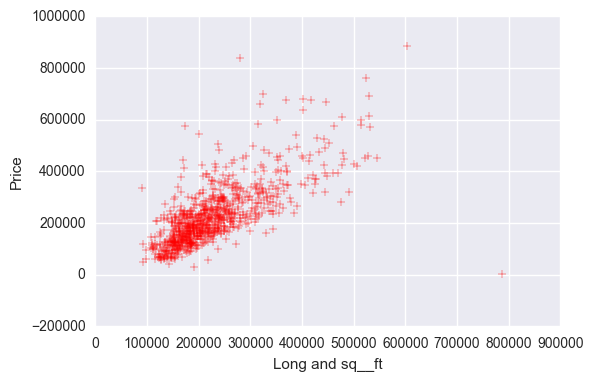

In [74]:
import statsmodels.api as sm
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error


columns = ['beds','baths','sq__ft','longitude','latitude']

def modeler(lst):
    lm = linear_model.LinearRegression()

    X = clean[lst]
    y = clean['price']
    
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    MSE = mean_squared_error(y, predictions)
    return MSE
    #print "MSE %s: %s" % (lst, MSE)
    
best = 0
combo = ""
for x in columns:
    for y in columns:
        if x != y:
            MSE = modeler([x,y])
            #print MSE
            if MSE < best or best == 0:
                best = MSE
                combo = "%s and %s" % (x,y)  
print "%s: %s" % (combo, best)

######################
lm = linear_model.LinearRegression()

X = clean[['longitude','sq__ft']]
y = clean['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Long and sq__ft")
plt.ylabel("Price")
plt.show()


## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [87]:
#best of 3 vars
best = 0
combo = ""
for x in columns:
    for y in columns:
        for z in columns:
            if x != y and x != z:
                MSE = modeler([x,y,z])
                #print MSE
                if MSE < best or best == 0:
                    best = MSE
                    combo = "%s and %s and %s" % (x,y,z)

print "Best of three vars"
print "%s: %s" % (combo, best)


def model_plotter(lst, target):
    lm = linear_model.LinearRegression()

    X = clean[lst]
    y = clean[target]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
    plt.xlabel(lst)
    plt.ylabel(target)
    plt.show()
    
    print "MSE: %s" % mean_squared_error(y, predictions)

# MSE goes down when you add both lat and long vs sq ft
# model_plotter(['latitude'],'sq__ft')
# MSE: 435449.145075
# model_plotter(['longitude'],'sq__ft')
# MSE: 432026.643214
# model_plotter(['longitude','latitude'],'sq__ft')
# MSE: 420780.785874



Best of three vars
sq__ft and latitude and longitude: 6878171335.57


In [139]:
import numpy as np
clean['coordinates'] = zip(clean['longitude'],clean['latitude'])

melt = pd.melt(clean[['price','coordinates','type']], id_vars = ['coordinates','type'])
melt

#pd.pivot_table(new_df[['ALIGN','activity']], columns=['ALIGN'],aggfunc=len)
pd.pivot_table(melt, index = ['coordinates','type'], aggfunc = np.sum)

#Decided to mess with starting a heat map instead.. I believe that this 
#would get me the right data to plot a heat map with different colors for 
#type of residence.

/Users/jroyalty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,,value
coordinates,type,
"(-121.550527, 38.49026)",Residential,232000
"(-121.549521, 38.658182)",Residential,304037
"(-121.549437, 38.665696)",Residential,465000
"(-121.549049, 38.644406)",Condo,232500
"(-121.547664, 38.490408)",Residential,311518
"(-121.547572, 38.656251)",Residential,260000
"(-121.545947, 38.487885)",Residential,415000
"(-121.544023, 38.648879)",Condo,265000
"(-121.54255, 38.604969)",Residential,246000
